Installing the Necessary Libraries

In [1]:
!pip install nltk
!pip install wordcloud
import nltk
nltk.download('punkt')         # Standard tokenizer data
nltk.download('punkt_tab')     # Additional punkt_tab resource (if available)
nltk.download('stopwords')
!pip install tqdm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
import pandas as pd

# Load the uploaded dataset to examine its structure and contents
file_path = '/content/train.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = {
    "Shape": data.shape,
    "Columns": data.columns.tolist(),
    "Data Types": data.dtypes.to_dict(),
    "Missing Values": data.isnull().sum().to_dict(),
    "Sample Data": data.head()
}

data_info


{'Shape': (3512, 2),
 'Columns': ['Context', 'Response'],
 'Data Types': {'Context': dtype('O'), 'Response': dtype('O')},
 'Missing Values': {'Context': 0, 'Response': 4},
 'Sample Data':                                              Context  \
 0  I'm going through some things with my feelings...   
 1  I'm going through some things with my feelings...   
 2  I'm going through some things with my feelings...   
 3  I'm going through some things with my feelings...   
 4  I'm going through some things with my feelings...   
 
                                             Response  
 0  If everyone thinks you're worthless, then mayb...  
 1  Hello, and thank you for your question and see...  
 2  First thing I'd suggest is getting the sleep y...  
 3  Therapy is essential for those that are feelin...  
 4  I first want to let you know that you are not ...  }

In [3]:
data

,Context,Response
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb..."
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see..."
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...
...,...,...
3507,My grandson's step-mother sends him to school ...,Absolutely not! It is never in a child's best ...
3508,My boyfriend is in recovery from drug addictio...,I'm sorry you have tension between you and you...
3509,The birth mother attempted suicide several tim...,"The true answer is, ""no one can really say wit..."
3510,I think adult life is making him depressed and...,How do you help yourself to believe you requir...



### Inference Summary:

1. **Dataset Overview**:
   - The dataset contains **3512 rows** and **2 columns** (`Context` and `Response`).
   - There are **4 missing values** in the `Response` column but no missing values in the `Context` column.

2. **Textual Insights**:
   - `Context` and `Response` texts exhibit frequent usage of terms like *feel*, *help*, and *relationship*.
   - Notable bigrams include phrases like *don know*, *feel like* in the `Context`, and *sounds like*, *mental health* in the `Response`.

3. **Potential Use Cases**:
   - This data is suitable for analyzing conversational patterns or training response models.
   - Insights on emotional sentiment and recurring themes can be used for mental health applications.

4. **Next Steps**:
   - Address missing values in the `Response` column.
   - Expand text analysis to explore sentiment, topic modeling, or clustering.

5. **Use case in our study**:
    - In our study it is used to build the web appplication, which is used to helph the Users can search a database that contains the mental health counseling data




In [4]:
data.isnull().sum()

,0
Context,0
Response,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3512 entries, 0 to 3511
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Context   3512 non-null   object
 1   Response  3508 non-null   object
dtypes: object(2)
memory usage: 55.0+ KB


In [6]:
!pip install wordcloud
from wordcloud import WordCloud

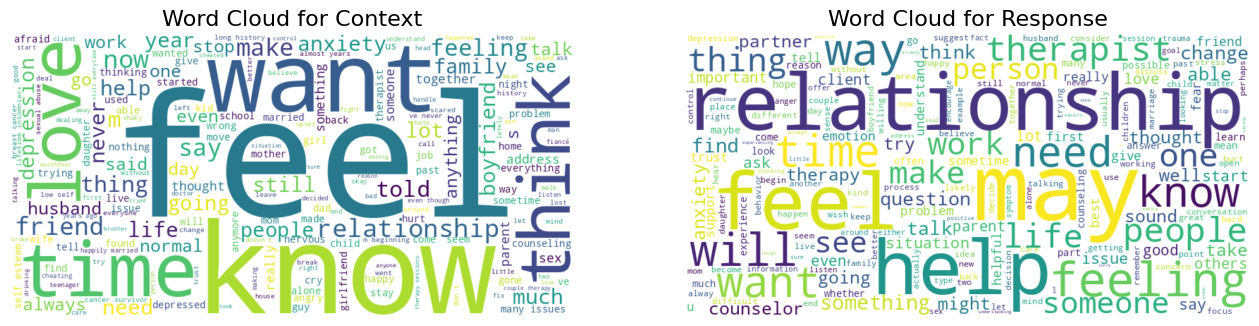

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text data from each column for word cloud generation
context_text = " ".join(data['Context'].dropna().astype(str))
response_text = " ".join(data['Response'].dropna().astype(str))

# Generate word clouds for both columns
context_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(context_text)
response_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(response_text)

# Plot the word clouds
plt.figure(figsize=(16, 8))

# Word cloud for Context
plt.subplot(1, 2, 1)
plt.imshow(context_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Context", fontsize=16)
plt.axis('off')

# Word cloud for Response
plt.subplot(1, 2, 2)
plt.imshow(response_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Response", fontsize=16)
plt.axis('off')

plt.show()


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Function to get top frequent words and n-grams
def get_top_frequent(text, ngram_range=(1, 1), top_n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    text_vectorized = vectorizer.fit_transform([text])
    word_counts = Counter(dict(zip(vectorizer.get_feature_names_out(), text_vectorized.toarray().sum(axis=0))))
    return word_counts.most_common(top_n)

# Analyze unigrams (single words)
top_unigrams_context = get_top_frequent(context_text, ngram_range=(1, 1))
top_unigrams_response = get_top_frequent(response_text, ngram_range=(1, 1))

# Analyze bigrams (two-word combinations)
top_bigrams_context = get_top_frequent(context_text, ngram_range=(2, 2))
top_bigrams_response = get_top_frequent(response_text, ngram_range=(2, 2))

# Combine results for display
frequent_words_ngrams = {
    "Context Top Unigrams": top_unigrams_context,
    "Response Top Unigrams": top_unigrams_response,
    "Context Top Bigrams": top_bigrams_context,
    "Response Top Bigrams": top_bigrams_response,
}


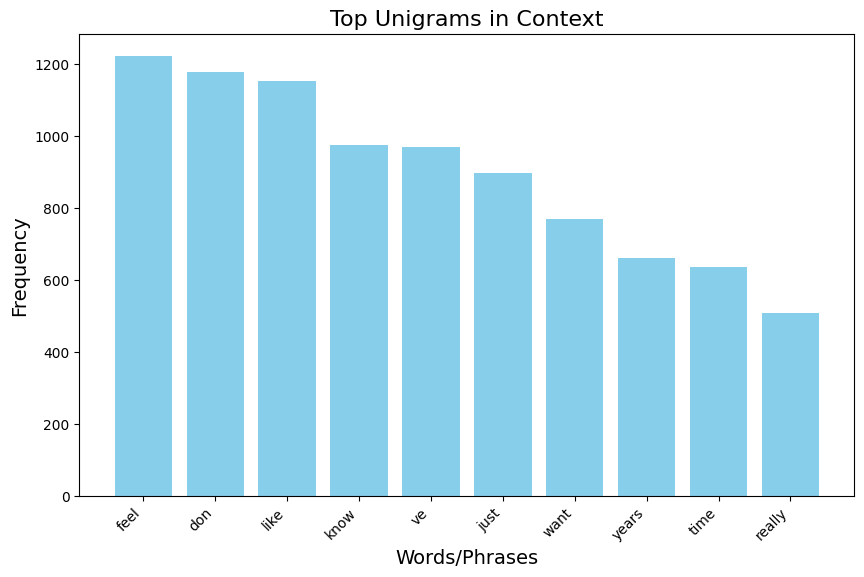

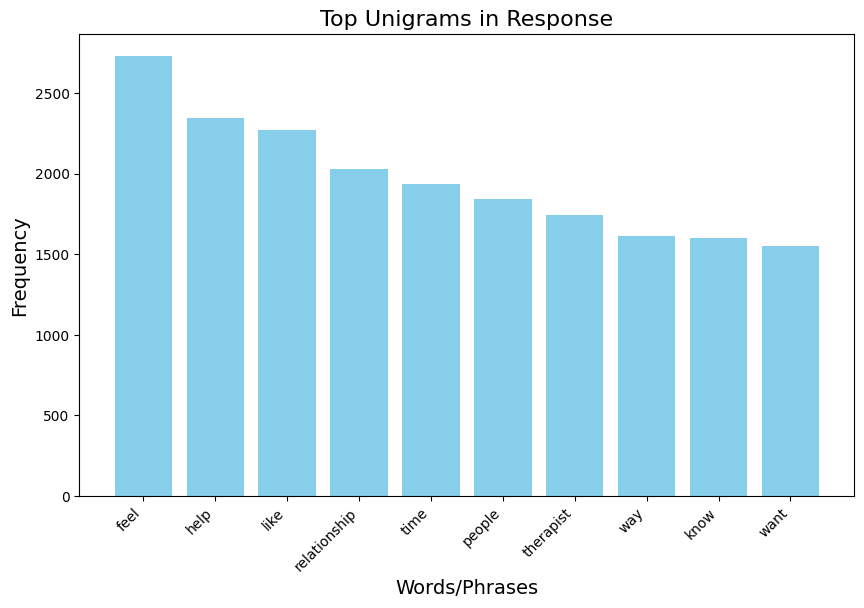

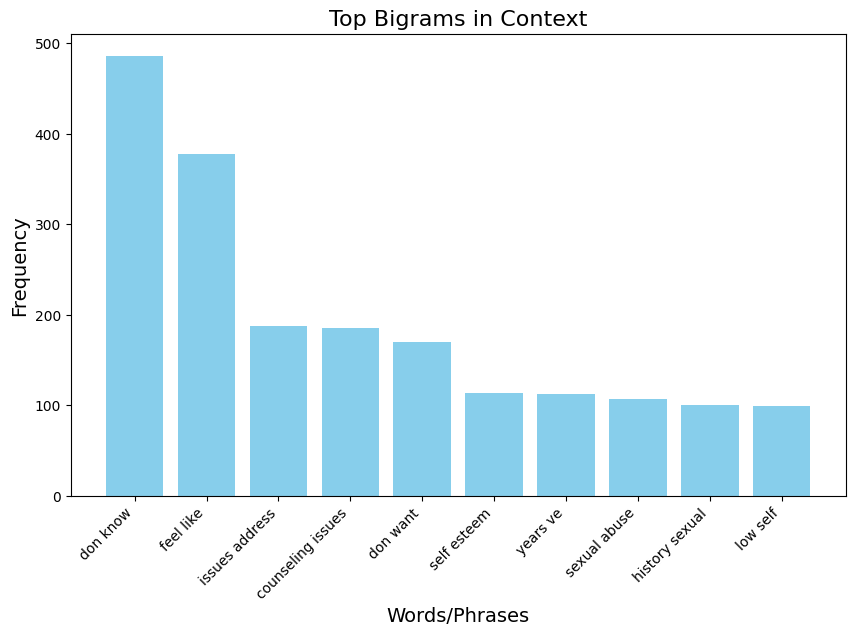

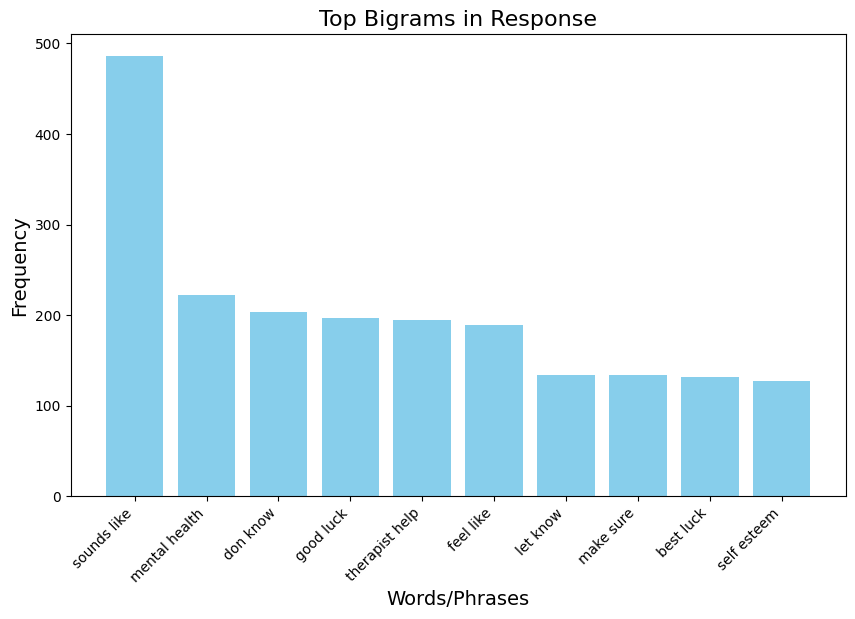

In [9]:
import matplotlib.pyplot as plt

# Prepare data for plotting
def plot_top_frequent_words(title, data, top_n=10):
    words, counts = zip(*data[:top_n])
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.title(title, fontsize=16)
    plt.ylabel('Frequency', fontsize=14)
    plt.xlabel('Words/Phrases', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Plot unigrams for Context and Response
plot_top_frequent_words("Top Unigrams in Context", top_unigrams_context)
plot_top_frequent_words("Top Unigrams in Response", top_unigrams_response)

# Plot bigrams for Context and Response
plot_top_frequent_words("Top Bigrams in Context", top_bigrams_context)
plot_top_frequent_words("Top Bigrams in Response", top_bigrams_response)
